### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn essentials
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the cleaned DF and check basic properties

In [4]:
import pickle
with open("loan_df", 'rb') as picklefile: 
    loan_df = pickle.load(picklefile)

In [5]:
loan_df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Current_Address_Yrs,Age,Num_Credits,Dependents,...,Job_A172,Job_Skilled,Job_Management,Foreign_Yes,Foreign_No,Sex_Female,Sex_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,-100,6,1169,0,10.0,4,4,67,2,1,...,0,1,0,1,0,0,1,0,0,1
1,5000,48,5951,500,2.0,2,2,22,1,1,...,0,1,0,1,0,1,0,0,1,0
2,0,12,2096,500,5.0,2,3,49,1,2,...,1,0,0,1,0,0,1,0,0,1
3,-100,42,7882,500,5.0,2,4,45,1,2,...,0,1,0,1,0,0,1,0,0,1
4,-100,24,4870,500,2.0,3,4,53,2,2,...,0,1,0,1,0,0,1,0,0,1


In [6]:
loan_df.describe()

,Status_Checking_Acc,Duration_in_Months,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Current_Address_Yrs,Age,Num_Credits,Dependents,...,Job_A172,Job_Skilled,Job_Management,Foreign_Yes,Foreign_No,Sex_Female,Sex_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2577.600000,20.903000,3271.258000,1834.500000,4.164000,2.973000,2.845000,35.546000,1.407000,1.155000,...,0.20000,0.630000,0.148000,0.963000,0.037000,0.310000,0.690000,0.050000,0.402000,0.54800
std,5028.794686,12.053989,2821.607329,3542.155999,3.703086,1.118267,1.103276,11.370917,0.577423,0.361941,...,0.40004,0.482853,0.355136,0.188781,0.188781,0.462539,0.462539,0.217967,0.490351,0.49774
min,-100.000000,4.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-100.000000,12.000000,1365.500000,500.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,18.000000,2319.500000,500.000000,2.000000,3.000000,3.000000,33.000000,1.000000,1.000000,...,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,5000.000000,24.000000,3972.250000,500.000000,10.000000,4.000000,4.000000,42.000000,2.000000,1.000000,...,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000
max,20000.000000,72.000000,18424.000000,15000.000000,10.000000,4.000000,4.000000,75.000000,4.000000,2.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
loan_df.shape

(5000, 48)

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
Status_Checking_Acc            5000 non-null int64
Duration_in_Months             5000 non-null int64
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null int64
Years_At_Present_Employment    5000 non-null float64
Inst_Rt_Income                 5000 non-null int64
Current_Address_Yrs            5000 non-null int64
Age                            5000 non-null int64
Num_Credits                    5000 non-null int64
Dependents                     5000 non-null int64
Default                        5000 non-null int64
Credits_Paid_Duly              5000 non-null uint8
Credits_Paid_Duly              5000 non-null uint8
Credits_PaidBack_TilNow        5000 non-null uint8
Credit_Delayed_InPast          5000 non-null uint8
Credit_CriticalAccount         5000 non-null uint8
Purpose_Car                    5000 non-null uint8
Purpose_Others          

### 11 numerical variables and 37 dummy variables

### Target variable will be 'Default' (Y).  The value 1 means the customer defaulted, while 0 means there was no default

In [32]:
y = loan_df['Default']

In [9]:
loan_df['Default'].value_counts()

0    3505
1    1495
Name: Default, dtype: int64

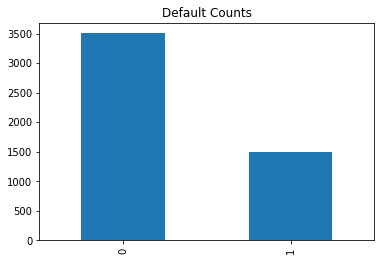

In [10]:
loan_df['Default'].value_counts().plot('bar',title='Default Counts')
plt.show()

### As you can see, there is some imbalance with a 70/30% split of the target variable.  3505 customers have not defaulted, while 1495 have defaulted.

### Seperate the numerical variables of the dataset, and then we can incorporate the dummy variables.

In [11]:
num_cols = ['Status_Checking_Acc', 'Duration_in_Months', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_Credits', 'Dependents']

In [12]:
num_df = loan_df[num_cols]

### Let's explore the default descrepancies between numeric variables

In [13]:
num_df.corr()

,Status_Checking_Acc,Duration_in_Months,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Current_Address_Yrs,Age,Num_Credits,Dependents
Status_Checking_Acc,1.000000,-0.034639,-0.044203,0.003731,-0.041517,-0.063497,-0.087537,0.001895,-0.061823,-0.038317
Duration_in_Months,-0.034639,1.000000,0.624984,-0.055766,0.050224,0.074749,0.034067,-0.036136,-0.011284,-0.023834
Credit_Amount,-0.044203,0.624984,1.000000,-0.084576,0.004127,-0.271316,0.028926,0.032716,0.020795,0.017142
Savings_Acc,0.003731,-0.055766,-0.084576,1.000000,0.039891,0.014148,0.014166,0.023550,-0.001536,-0.011193
Years_At_Present_Employment,-0.041517,0.050224,0.004127,0.039891,1.000000,0.136691,0.295228,0.332548,0.140682,0.095953
Inst_Rt_Income,-0.063497,0.074749,-0.271316,0.014148,0.136691,1.000000,0.049302,0.058266,0.021669,-0.071207
Current_Address_Yrs,-0.087537,0.034067,0.028926,0.014166,0.295228,0.049302,1.000000,0.266419,0.089625,0.042643
Age,0.001895,-0.036136,0.032716,0.023550,0.332548,0.058266,0.266419,1.000000,0.149254,0.118201
Num_Credits,-0.061823,-0.011284,0.020795,-0.001536,0.140682,0.021669,0.089625,0.149254,1.000000,0.109667
Dependents,-0.038317,-0.023834,0.017142,-0.011193,0.095953,-0.071207,0.042643,0.118201,0.109667,1.000000


In [15]:
num_df.describe()

,Status_Checking_Acc,Duration_in_Months,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Current_Address_Yrs,Age,Num_Credits,Dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2577.600000,20.903000,3271.258000,1834.500000,4.164000,2.973000,2.845000,35.546000,1.407000,1.155000
std,5028.794686,12.053989,2821.607329,3542.155999,3.703086,1.118267,1.103276,11.370917,0.577423,0.361941
min,-100.000000,4.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,-100.000000,12.000000,1365.500000,500.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,500.000000,2.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,5000.000000,24.000000,3972.250000,500.000000,10.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,20000.000000,72.000000,18424.000000,15000.000000,10.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
#Look at differences between high duration of loans vs low duration
dur_high = loan_df[loan_df['Duration_in_Months'] > 18]
dur_low = loan_df[loan_df['Duration_in_Months'] < 18]

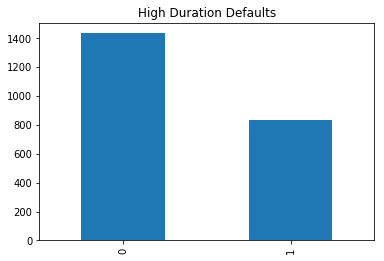

In [21]:
dur_high['Default'].value_counts().plot('bar',title='High Duration Defaults')
plt.show()

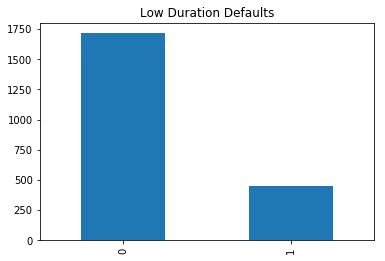

In [20]:
dur_low['Default'].value_counts().plot('bar',title='Low Duration Defaults')
plt.show()

### As you can see, signficant differences for default rates of loans above and below 18 months

In [22]:
age_high = loan_df[loan_df['Age'] > 33]
age_low = loan_df[loan_df['Age'] < 33]

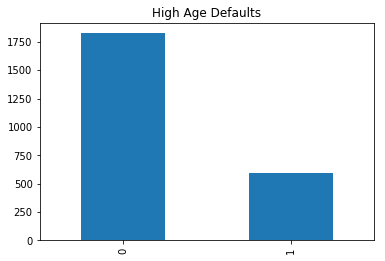

In [23]:
age_high['Default'].value_counts().plot('bar',title='High Age Defaults')
plt.show()

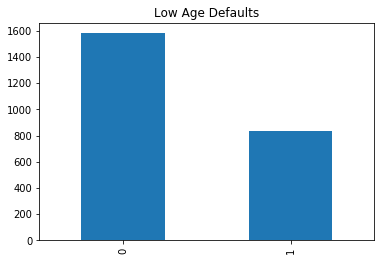

In [24]:
age_low['Default'].value_counts().plot('bar',title='Low Age Defaults')
plt.show()

### Younger applicants appear to have a much higher default rate

In [25]:
years_high = loan_df[loan_df['Years_At_Present_Employment']>2]
years_low= loan_df[loan_df['Years_At_Present_Employment']<2]

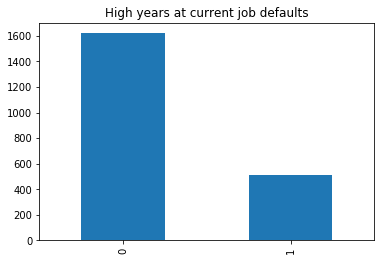

In [30]:
years_high['Default'].value_counts().plot('bar',title='High years at current job defaults')
plt.show()

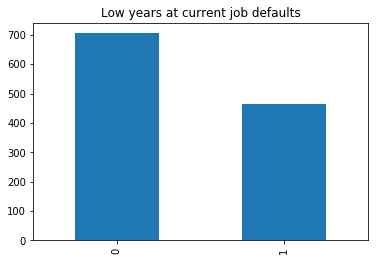

In [29]:
years_low['Default'].value_counts().plot('bar',title='Low years at current job defaults')
plt.show()

### Applicants with less years at current employment have defaulted at a much higher rate

In [126]:
#In order to avoid collinearity and other issues, a subset of features will be used in modeling
X = loan_df[['Duration_in_Months','Credit_Amount','Savings_Acc','Years_At_Present_Employment','Inst_Rt_Income','Age','Num_Credits','Credits_PaidBack_TilNow','OtherPlans_Bank','Purpose_Car','Debtors_Guarantor','Property_Building/Insurance','Housing_Rent',
              'Job_Skilled','Foreign_Yes','Sex_Male',
              'Sex_Female',
              'Marital_Status_Married']]

# Logistic Regression

### First, We will perform this model with Sklearn to retrieve key accuracy scores and classification report.  Since there are so many dummy variables, not all of them will utilized.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test,logit_model.predict(X_test)))

0.7208
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       862
           1       0.63      0.24      0.35       388

   micro avg       0.72      0.72      0.72      1250
   macro avg       0.68      0.59      0.59      1250
weighted avg       0.70      0.72      0.68      1250



/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decent scores for logistic regression, let's create a confusion matrix so we can visualize our errors.

In [39]:
# Generate a confusion matrix plot: 
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
#Use this function to generate scores for any classifier:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
   
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    

    plot_confusion_matrix(cm)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Accuracy: 0.72
Test Data Accuracy:     0.72
[[656  53]
 [227  64]]


Precision:              0.74
Recall:                 0.93


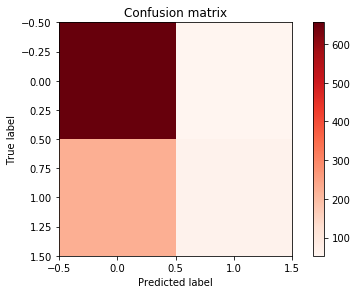

In [127]:
#Run the function with logistic regression
train_score(logit_model,X,y)
plt.show()

### Let's generate a ROC curve for this logistic model as well.

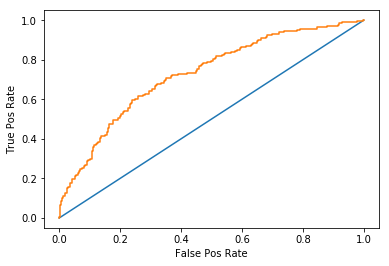

In [52]:
from sklearn.metrics import roc_curve, auc

#predicts probability rather than actual value
y_score=logit_model.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


# Plotting our curves
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.show()

### Very high number of false positives, which is what we're trying to avoid.  GridSearch CV will be implementated to retrieve the optimal C value and hopefully improve accuracy of the model.

In [128]:
param_grid = dict(C=np.linspace(1, 20, 200))
logreg = LogisticRegression(solver='lbfgs')

#grid will be created with 5 folds to find parameter
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)

In [43]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   26.4s


CPU times: user 2.71 s, sys: 600 ms, total: 3.31 s
Wall time: 32.5 s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 1.     ,  1.09548, ..., 19.90452, 20.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [45]:
grid.best_params_

{'C': 11.50251256281407}

In [46]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=11.50251256281407, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
{'C': 11.50251256281407}
0.7256


### Very slight improvements with the optimal C value.  Let's take a look at logistic regression through statsmodels, this way we can a nice results summary.  This allows us to view the significance of coefficient of each feature.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = sm.add_constant(X_train)
logit_s_model = sm.Logit(y_train, X_train)
results = logit_s_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.542034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3732
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                  0.1066
Time:                        20:26:43   Log-Likelihood:                -2032.6
converged:                       True   LL-Null:                       -2275.3
                                        LLR p-value:                 2.345e-92
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5492   3.58e+06  -7.12e-07      1.000   -7.01e+06    7.01e+06
Duration_in_Months              0.0336      0.004      7.856      0.000       0.025       0.042
Credit_Amount                5.603e-05   1.88e-05      2.980      0.003    1.92e-05    9.29e-05
Savings_Acc                  -6.08e-05   1.27e-05     -4.786      0.000   -8.57e-05   -3.59e-05
Years_At_Present_Employment    -0.0661      0.012     -5.529      0.000      -0.090      -0.043
Inst_Rt_Income                  0.2632      0.040      6.570      0.000       0.185       0.342
Age                            -0.0110      0.004     -2.761      0.006      -0.019      -0.003
Num_Credits                    -0.0111      0.082     -0.135      0.893      -0.172       0.150
Credits_PaidBack_TilNow         0.1597      0.093      1.723      0.085      -0.022       0.341
OtherPlans_Bank                 0.6938      0.105      6.610      0.000       0.488       0.899
Purpose_Car                     0.7511      0.090      8.359      0.000       0.575       0.927
Debtors_Guarantor              -0.6670      0.204     -3.262      0.001      -1.068      -0.266
Property_Building/Insurance     0.0419      0.092      0.458      0.647      -0.138       0.222
Housing_Rent                    0.6488      0.101      6.402      0.000       0.450       0.847
Job_Skilled                     0.0034      0.082      0.041      0.967      -0.158       0.164
Foreign_Yes                     1.5522      0.334      4.646      0.000       0.897       2.207
Sex_Male                       -1.3608   3.58e+06   -3.8e-07      1.000   -7.01e+06    7.01e+06
Sex_Female                     -1.1883   3.58e+06  -3.32e-07      1.000   -7.01e+06    7.01e+06
Marital_Status_Married          0.0530      0.141      0.377      0.706      -0.223       0.329
===============================================================================================
"""

### There are some interesting takeaways from these results, but the categorical variables appear to be scewing the data.  We're going to hold off on interpreting the coefficients until we narrow done the features to a manageable number.

## KNN (K-Nearest Neighbors)

In [64]:
knn = KNeighborsClassifier(n_neighbors=6)

### We're going to create a function for KNN, since it requires standarization.

In [60]:
def classify_knn(model,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    scaler=StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(metrics.accuracy_score(y_test , y_pred))
    print(classification_report(y_test,model.predict(X_test))) 

In [65]:
classify_knn(knn,X,y)

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


0.8392
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       862
           1       0.90      0.54      0.68       388

   micro avg       0.84      0.84      0.84      1250
   macro avg       0.86      0.76      0.79      1250
weighted avg       0.85      0.84      0.83      1250



### This is a very acceptable KNN score.  scores are even higher for n_neighbors of ranges 1-5.  But I established that those neighbor values were overfitting the model, and were not realistic outcomes for out of sample data.

### Let's generate a confusion matrix for KNN, and we can compare it to the logistic matrix as well.

Training Data Accuracy: 0.96
Test Data Accuracy:     0.84
[[660  49]
 [110 181]]


Precision:              0.86
Recall:                 0.93


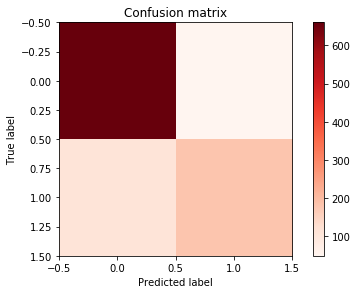

In [66]:
train_score(knn,X,y)
plt.show()

#### KNN Matrix ^

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Accuracy: 0.72
Test Data Accuracy:     0.72
[[656  53]
 [227  64]]


Precision:              0.74
Recall:                 0.93


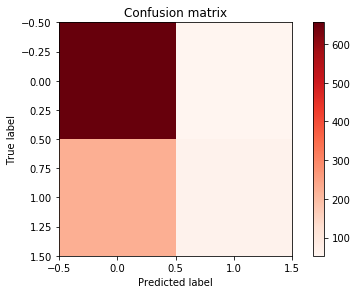

In [67]:
train_score(logit_model,X,y)
plt.show()

#### Logistic Regression Matrix ^

### In the KNN matrix (First one), we can focus on the bottom left square, and see that the square is a  much lighter shade of red.  Why is that?

### This is due to signficantly less false positives from the KNN model, which is exactly what were trying to achieve.  In this case, a false positive is when we predict a customer will honor the loan, but in reality they default.

### Although the logistic regression model provides some useful insights, it is clear that KNN is a much stronger predictor of the target default variable.

## Random Forest

In [115]:
randomforest = RandomForestClassifier(max_features='sqrt',min_samples_leaf=8,oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,randomforest.predict(X_test)))

0.88
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       862
           1       0.96      0.64      0.77       388

   micro avg       0.88      0.88      0.88      1250
   macro avg       0.91      0.81      0.84      1250
weighted avg       0.89      0.88      0.87      1250



/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### Looks like random forest performs even better than KNN, we can implement the feature importance attribute from random forest, to get a feel for the features that are producing the highest impact for our models.

In [71]:
randomforest.feature_importances_

array([0.15217361, 0.21536692, 0.06638471, 0.07732678, 0.05720658,
       0.16402428, 0.02353646, 0.03584887, 0.02340432, 0.04631495,
       0.00708848, 0.0296899 , 0.02199396, 0.02193472, 0.00805795,
       0.01392326, 0.01954912, 0.01617513])

In [73]:
#fitting of random forest model
randomforest.fit(X_train, y_train)

#generate list of top feature importances
importances = randomforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))

Feature ranking:
0. feature 1 (0.211770)
1. feature 0 (0.166618)
2. feature 5 (0.164793)
3. feature 2 (0.079938)
4. feature 3 (0.065961)
5. feature 4 (0.060084)
6. feature 9 (0.042555)
7. feature 12 (0.031308)
8. feature 7 (0.027691)
9. feature 6 (0.026711)
10. feature 11 (0.022421)
11. feature 16 (0.019684)
12. feature 8 (0.019214)
13. feature 13 (0.018446)
14. feature 17 (0.017262)
15. feature 15 (0.013446)
16. feature 10 (0.006986)
17. feature 14 (0.005112)


/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### Random forest manifested that the numerical columns have strongest power in our models, and they have taken over.  We will make a plot of all the numerical columns to find they're relative feature importances

/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/peyjmonahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Feature ranking:
0. feature 1 (0.221218)
1. feature 5 (0.173231)
2. feature 0 (0.145421)
3. feature 3 (0.075486)
4. feature 4 (0.064577)
5. feature 2 (0.056293)
6. feature 9 (0.044744)
7. feature 13 (0.035002)
8. feature 6 (0.028947)
9. feature 11 (0.028641)
10. feature 7 (0.026940)
11. feature 12 (0.025057)
12. feature 8 (0.020948)
13. feature 17 (0.015460)
14. feature 15 (0.014523)
15. feature 16 (0.009763)
16. feature 10 (0.007742)
17. feature 14 (0.006006)


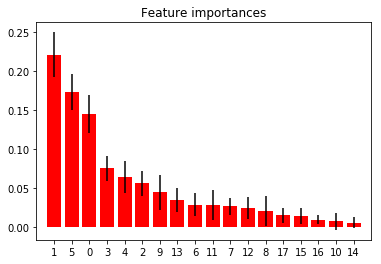

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
randomforest.fit(X_train, y_train)
importances = randomforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Above is a visual of the feature importances, you can see the corresponding names of these features below.

In [122]:
col = X.columns
top_features = [col[1],col[5],col[0],col[3],col[2]]
print(top_features)

['Credit_Amount', 'Age', 'Duration_in_Months', 'Years_At_Present_Employment', 'Savings_Acc']


### At this point, we have narrowed it down to about 5 features.  We can run another statsmodels model to interpret the coefficients and grasp the final influences of the variables.

In [123]:
X1 = loan_df[top_features]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)
X_train = sm.add_constant(X_train)
logit_s_model = sm.Logit(y_train, X_train)
results = logit_s_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.572749
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                 0.05603
Time:                        20:33:36   Log-Likelihood:                -2147.8
converged:                       True   LL-Null:                       -2275.3
                                        LLR p-value:                 4.768e-53
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9563      0.143     -6.683      0.000      -1.237      -0.676
Credit_Amount                4.427e-06   1.64e-05      0.269      0.788   -2.78e-05    3.67e-05
Age                            -0.0121      0.004     -3.302      0.001      -0.019      -0.005
Duration_in_Months              0.0380      0.004      9.715      0.000       0.030       0.046
Years_At_Present_Employment    -0.0603      0.011     -5.379      0.000      -0.082      -0.038
Savings_Acc                 -5.563e-05   1.24e-05     -4.503      0.000   -7.98e-05   -3.14e-05
===============================================================================================
"""

In [125]:
X1.head()

,Credit_Amount,Age,Duration_in_Months,Years_At_Present_Employment,Savings_Acc
0,1169,67,6,10.0,0
1,5951,22,48,2.0,500
2,2096,49,12,5.0,500
3,7882,45,42,5.0,500
4,4870,53,24,2.0,500


### By using the exp() of each coefficient, we can find the increase/decrease of risk for default per unit for our features.

## The results were the following risk increases/decreases:

### Duration of Loan: 1.3% increase for every month
### Credit Amount: 1.5% increase for every $1000 in account

### Years at Present Employment: 2% decrease for every year at same job 
### Savings Account: 1% decrease for every $500 in account
### Age: 1.2% decrease for every year

### Ultimately, we can reasonably accept these five features as strong predictors of whether an applicant is more likely to default or honor his/her loan.  We will continue to make any improvements to the models, as well as possible undersampling.  